In [1]:
import poppy
import astropy.units as u
import logging
import importlib
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm,LogNorm
import numpy as np
%matplotlib inline
plt.rcParams.update({"font.size":8})
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.DEBUG)



Starting with Maxwell's equations:
* Faraday: $\nabla \times \vec{E} = \frac{-\partial \vec{B}}{\partial t}$
* Ampere-Maxwell: $\nabla \times \vec{B} =\mu_o \epsilon_o\frac{\partial \vec{E}}{\partial t}+\mu_o \vec{J}$

Taking the curle of Faraday's law gives:

$\nabla \times (\nabla \times \vec{E}) = \frac{-\partial \vec{B}}{\partial t} =$
$\mu_o \epsilon_o\frac{\partial^2 \vec{E}}{\partial t^2}$

Taking advantage of the vector identity for a vector $\vec{X}$:

$\nabla \times (\nabla \times \vec{X}) = \nabla(\nabla \cdot \vec{X}) - \nabla^2\vec{X}$

and  Gauss' law for a wave in a vacuum ($\nabla\cdot\vec{E}=0$), we find the wave equation for the vector electric field:

$-\nabla^2\vec{E} = \mu_o \epsilon_o\frac{\partial^2 \vec{E}}{\partial t^2} $

To derive diffraction theory we will make a series of approximations.



Approx. 1) the scalar wave equation, which requires an approximately homogeneous medium. Each component of the wave equation can be expressed as a separate wave equation:

$\nabla^2E_x - \frac{n^2}{c^2}\frac{\partial^2E_x}{\partial t^2}=0$,

Any scalar component ($u$) follows the same equation:
 
$\nabla^2u - \frac{n^2}{c^2}\frac{\partial^2u}{\partial t^2}=0$.

Assuming a time-independent solution, this equation becomes the Helmoltz Equation ([Wikipedia](https://en.wikipedia.org/wiki/Helmholtz_equation), [Wolfram Mathworld](http://mathworld.wolfram.com/HelmholtzDifferentialEquation.html)):

$(\nabla^2 +(\frac{2\pi}{\lambda})^2)U=(\nabla^2 +k^2)U=0$

Which has the plane wave solution:

$p(x,y,z,t) = e^{j(\vec{k}\cdot\vec{r}-2\pi\nu t)}$

Fourier transforms:

TO DO.

Approx. 2) Paraxial solution, where the angle between $k$ and the optical axis $z$ is small. 

plugging in the plane wave solution

$u(P,t)= Re\{U(P)e^{-i2\pi\nu t}\}$

where the phasor is composed of the wave amplitude and phase: $U(P)=A(p)e^{i\phi(P)}$

### Action of a Lens

As detailed subsequently, in the paraxial approximation, the operation of a lens is to apply a quadratic phase function, which is equivalent to a parabolic surface.

The action of a lens is to change the phase as a function of radius. 
Neglecting propagation between the curved surface 
For a lens with a spherical surface radius R, the optical path difference in the $x,y$ plane is 

$\Delta (x,y) = n(C \pm \left(R-\sqrt{R^2-x^2-y^2}\right))$
$ = n(C \pm R\left(1-\sqrt{1-\frac{x^2-y^2}{R^2}}\right))$.

Where C is a constant depending on the total thickness of the lens and the sign depends on the the orientation of the surface relative to the incident beam.

In the paraxial case, the relation above becomes:

$\Delta (x,y) = C \pm R\left({\frac{x^2-y^2}{2R}}\right)$.

for lens with two radii of curvature, the total thickness is:

$\Delta (x,y) = C - \frac{x^2-y^2}{2}\left(\frac{1}{R_1}-\frac{1}{R_2}\right)$.

Expressing the focal length as the thin lensmakers equation:

$\frac{1}{f}\equiv (n-1)\left(\frac{1}{R_1} -\frac{1}{R_2}\right)$.

$\Delta (x,y) = C - \frac{x^2-y^2}{2}\frac{1}{(n-1)f}$.

the phase difference due to glass lens of index of refraction $n$ is:

$\Delta\phi(x,y) = kn\Delta(x,y) + k(\Delta_0-\Delta(x,y))$

The action of the lens on an incident wavefront can be expressed as a complex transformation of:

$e^{jk\Delta_0}e^{jk(n-1)\Delta(x,y)} = e^{-j\frac{k}{2f}(x^2-y^2)}$ 

This is the same quadratic phase factor as far-field propagation and a parabolic optic.

Thus, the transformation of a lens from a plane-wave to a focal plane is the same Fraunhofer far-field propagation.

(Goodman eq. 5-1).

The propagation approach use by POPPY, described in Lawrence 1992, defines the wavefront state in terms of inside and outside the Rayleigh range. 
Inside is defined as planar, and outside is defined as spherical. 

Propagation between any two planes is carried out by first determining whether the source and target plane will be spherical. 

References:

Goodman 2005.

Lawrence 1992.

In [2]:
#define some parameters of the Hubble Space Telescope 
diam = 2.4 * u.m
fl_pri = 5.52085 * u.m
d_pri_sec = 4.907028205 * u.m
fl_sec = -0.6790325 * u.m
d_sec_to_focus = 6.3919974 * u.m
poppy.FresnelWavefront

poppy.fresnel.FresnelWavefront

### Initiate a plane wave 

and apply a circular aperture.

DEBUG:Padded WF array for oversampling by 2, to (1024, 1024).


(<matplotlib.axes._subplots.AxesSubplot at 0x10ce7af60>,
 <matplotlib.axes._subplots.AxesSubplot at 0x114d14c88>)

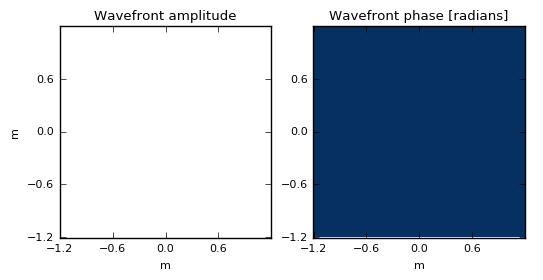

In [3]:
wf_init = poppy.FresnelWavefront(1.2*u.m,
    wavelength=500*u.nm,
    npix=512,
    oversample=2)
wf_init.display(what="both")

DEBUG:  Multiplied WF by phasor for Optic: Circle, radius=1.2 m


(<matplotlib.axes._subplots.AxesSubplot at 0x114d2f550>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1152145f8>)

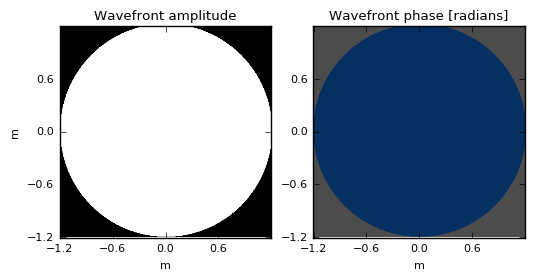

In [4]:
wf_init *= poppy.CircularAperture(radius=diam.value/2.)
wf_init.display(what="both")

### Multiply the wavefront by a lens operator

Multiplication of the wavefront by a Quadradic lens OpticalElement initiates a sequence of calculations:



DEBUG:  Multiplied WF by phasor for Pupil plane: Secondary Obscuration with 4 supports (Analytic)
DEBUG:Initialized: Primary, fl =5.52e+00 m
DEBUG:Initialized: Secondary, fl =-6.79e-01 m
DEBUG:------ Applying Lens: Primary ------
DEBUG:  Pre-Lens Beam Parameters: w_0:1.200e+00 m, z_w0=0.000e+00 m
z=0.000e+00 m, z_r=9.048e-03 m2 / nm, r_c=inf m
DEBUG:  Beam radius at Primary =1.20e+00 m
DEBUG:Near focus, input flat wavefront and Primary has output beam curvature of =-5.52e+00 m
DEBUG:Primary has a curvature of =-5.52e+00 m
DEBUG:Primary has a curved output wavefront, with waist at 5.520849999997944 m
DEBUG:Post Optic Parameters:w_0:7.322e-07 m, z_w0=5.521e+00 m
z=0.000e+00 m, z_r=3.369e-15 m2 / nm, r_c=-5.521e+00 m
DEBUG:Set output beam focal length to 5.52085 m
DEBUG:Inside Rayleigh distance to Outside Rayleigh distance.
DEBUG:Applying spherical phase curvature =1.48e+13 m
DEBUG:Applying spherical lens phase =6.75e-14 1 / m
DEBUG:max_rsqd =1.15e+01 m2
DEBUG:  Multiplied WF by phasor fo

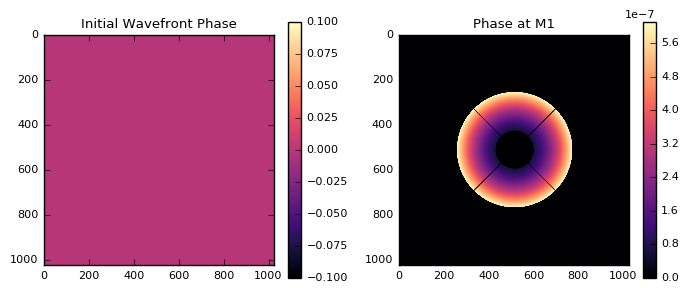

In [5]:
wf=wf_init.copy()
obscuration=poppy.SecondaryObscuration(secondary_radius=0.396,
                                 support_width=0.0264,
                                support_angle_offset=45.0)
wf *=obscuration

m1 = poppy.QuadraticLens(fl_pri, name='Primary')
m2 = poppy.QuadraticLens(fl_sec, name='Secondary')

plt.figure(figsize=[7,3])
plt.subplot(121)
plt.imshow(wf.phase,cmap=plt.cm.magma)
plt.colorbar()
plt.title("Initial Wavefront Phase")
wf *= m1
#wf.display(what="phase",colorbar=True,vmax=0.01,vmin=-.01)
plt.subplot(122)
plt.imshow(wf.phase,cmap=plt.cm.magma)
plt.colorbar()
plt.title("Phase at M1")
plt.tight_layout()

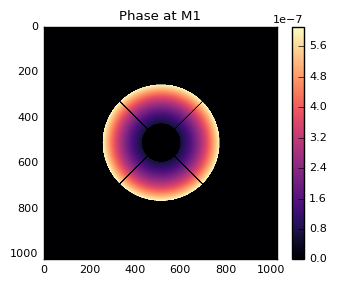

In [6]:
#wf.display(what="phase",colorbar=True,vmax=0.01,vmin=-.01)
plt.figure(figsize=[4,3])

plt.imshow(wf.phase,cmap=plt.cm.magma)
plt.colorbar()
plt.title("Phase at M1")

#### 1. Determine if the incident beam is spherical or planar.

If the input beam is planar (or the distance to the waist is less than the rayleigh distance), the radius of curvature of the input beam $r_i=\infty$ and output beam is the focal length $r_{o}=-f$.


#### 2. Calculate the radius of curvature of the guassian beam $r_c$:
If the input beam in not planar, then the lens operates on a curved wavefront and 

$\frac{1}{r_o} = \frac{1}{r_c}-\frac{1}{f}$

$r_c= \delta_z\left(1+(\frac{z_r}{\delta z})^2\right)$ 

Where $\delta z$ is the distance to the waist $\delta z= z-z_{w_0}$

For example, the beam incident on the HST secondary is curved, as can be see from the wavefront map below and the radius of curvature of the incident wave of -0.614 meters. 

#### 3. Calculate the new waist:

If the spot radius is $w$, the location of the new waist is:

$z_{w0} = \frac{-r_{o}}{ 1.0 + ( r_{o}\lambda / (\pi w)^2)^2} + z$

and

$w_0=\frac{w}{ \sqrt{1.0 + (\pi w^2 / (\lambda r_o)) ^2}}$


#### 4. Calculate the effective curvature

The effective curvature is calculated from the updated waist parameters, the incident curvature, and the focal length of the lens.
For a lens of focal length $fl$ and an incident curvature of $r_{in]$ this effective focal length:

$fl_{eff} = \frac{1}{\frac{1}{fl} + \frac{1}{(z - z_{w0})} - \frac{1}{r_{in}}}$

This effective focal length is then applied to the wavefront phase map via the quadratic lens function.



DEBUG:Beginning Fresnel Prop. Waist at z = 5.520849999997944 m
DEBUG:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:  Starting Pixelscale: 0.0046875 m / pix
DEBUG:Spherical to Waist propagation, dz=5.520849999997944 m
DEBUG:   Using numpy FFT
DEBUG:Applying spherical phase curvature =5.52e+00 m
DEBUG:Applying spherical lens phase =1.81e-01 1 / m
DEBUG:max_rsqd =1.73e-07 m2
DEBUG:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:  Intermediate Pixelscale: 575.0885416664526 nm / pix
DEBUG:Waist to Spherical propagation, dz=-0.6138217949979445 m
DEBUG:Applying spherical phase curvature =-6.14e-01 m
DEBUG:Applying spherical lens phase =-1.63e+00 1 / m
DEBUG:max_rsqd =1.73e-07 m2
DEBUG:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:   Using numpy FFT
DEBUG:------ Propagated to plane of type PlaneType.intermediate at z = 4.91e+00 m ------
DEBUG:------ Applying Lens: Secondary ------
DEBUG:  Pre-Len

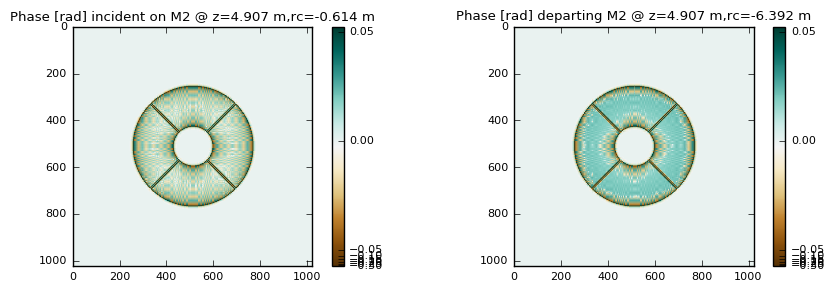

In [7]:

wf.propagate_fresnel(d_pri_sec)
plt.figure(figsize=[9,3])
plt.subplot(121)
plt.imshow(wf.phase*wf.intensity,
           cmap=plt.cm.BrBG,
           norm=SymLogNorm(2e-7,-2e-7))#,vmin=-20e-8)#,vmin=-100e-6)
plt.colorbar()
plt.title("Phase [rad] incident on M2 @ z="+str(np.round(wf.z,3))+
         ",rc="+str(np.round(wf.r_c(),3)))
plt.subplot(122)

wf*=m2
plt.imshow(wf.phase*wf.intensity,
           cmap=plt.cm.BrBG,
           norm=SymLogNorm(2e-7,-2e-7))#,vmin=-20e-8)#,vmin=-100e-6)
plt.title("Phase [rad] departing M2 @ z="+str(np.round(wf.z,3))+
         ",rc="+str(np.round(wf.r_c(),3)))
plt.colorbar()



plt.tight_layout()



### Propagate to the focus

Now to reach the waist, we propagate to the new waist $\delta z$. 

This is completed by first taking the FFT of the wavefront at the previous optic, calculating the new pixel scale, and then applying the quadratic operator with an effective focal length of the distance traveled.

An plot of the intensity confirms the wavefront is focused.

DEBUG:   Using numpy FFT
DEBUG:Applying spherical phase curvature =6.39e+00 m
DEBUG:Applying spherical lens phase =1.56e-01 1 / m
DEBUG:max_rsqd =1.42e-01 m2
DEBUG:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator


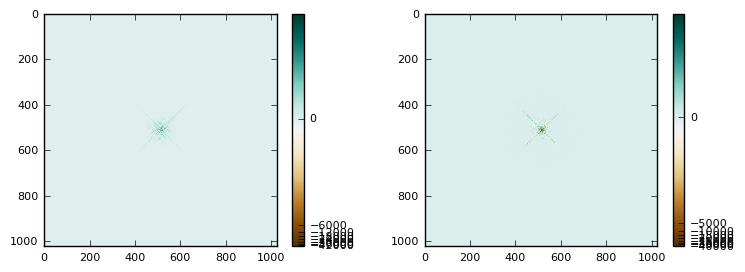

In [8]:
dz=wf.z_w0-wf.z
test_wf=wf.copy()
test_wf._fft()
plt.figure(figsize=[9,3])
plt.subplot(121)
plt.imshow( np.fft.fftshift(test_wf.phase*test_wf.intensity),
           cmap=plt.cm.BrBG,
           norm=SymLogNorm(2e-1,-2e-1))#,vmin=-20e-8)#,vmin=-100e-6)
plt.colorbar()

plt.subplot(122)

test_wf *= poppy.fresnel._QuadPhaseShifted(dz)
plt.imshow( np.fft.fftshift(test_wf.phase*test_wf.intensity),
           cmap=plt.cm.BrBG,
           norm=SymLogNorm(2e-1,-2e-1))#,vmin=-20e-8)#,vmin=-100e-6)

plt.colorbar()



DEBUG:Beginning Fresnel Prop. Waist at z = 11.2986926835285 m
DEBUG:  Spherical to Plane Regime, outside Z_R to inside Z_R
DEBUG:Spherical to Waist propagation, dz=6.391664478528501 m
DEBUG:   Using numpy FFT
DEBUG:Applying spherical phase curvature =6.39e+00 m
DEBUG:Applying spherical lens phase =1.56e-01 1 / m
DEBUG:max_rsqd =1.88e-05 m2
DEBUG:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:Skipping small dz = 0.0 m
DEBUG:------ Propagated to plane of type PlaneType.intermediate at z = 1.13e+01 m ------


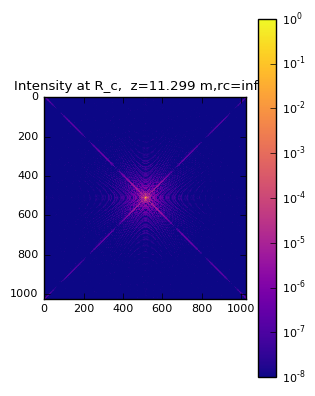

In [9]:

#propagate to the focus
wf.propagate_fresnel(dz)

wf.normalize()

plt.subplot(122)
plt.title("Intensity at R_c,  z="+str(np.round(wf.z,3))+
         ",rc="+str(np.round(wf.r_c(),3)))
plt.imshow(wf.intensity,
           cmap=plt.cm.plasma,
           norm=LogNorm(1e-8,1))#,vmin=-20e-8)#,vmin=-100e-6)
plt.colorbar()




plt.tight_layout()

